In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [6]:
file = open('../wind-js/temp.json')
js=json.load(file)
df = pd.json_normalize(js)

nx = df['header.nx'][0]
ny = df['header.ny'][0]
dx = df['header.dx'][0]
dy = df['header.dy'][0]
lo1 = df['header.lo1'][0]
la1 = df['header.la1'][0]
lo2 = df['header.lo2'][0]
la2 = df['header.la2'][0]

x = np.linspace(lo1, lo2, nx)
y = np.linspace(la1, la2, ny)
xx,yy = np.meshgrid(x,y)

In [7]:
u = np.array(df['data'][0]).reshape(ny,nx)
v = np.array(df['data'][1]).reshape(ny,nx)

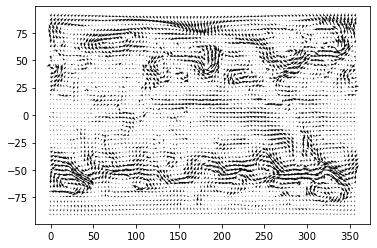

In [8]:
δx=4
δy=δx
plt.quiver(xx[::δx,::δy],yy[::δx,::δy],u[::δx,::δy],v[::δx,::δy])
plt.show()

In [31]:
np.max(u), np.max(uu)

(36.52, 36.52)

In [11]:
uu = np.zeros_like(u)
vv = np.zeros_like(v)

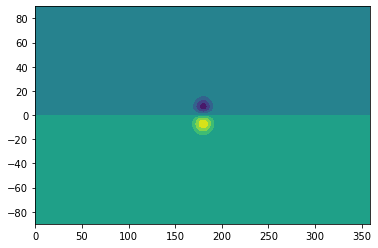

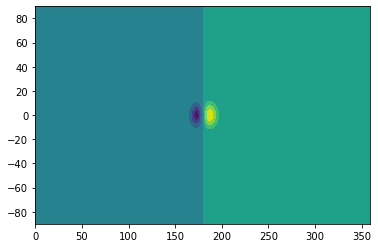

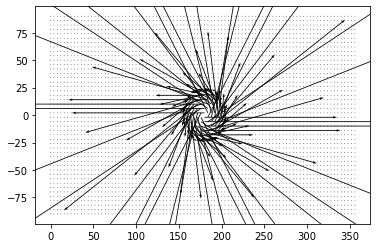

In [30]:
λx = 10
λy = 10
x0=180
Δ = 1e8
uu = -yy/λy/Δ*np.exp(-((xx-x0)/λx)**2 -((yy)/λy)**2)
vv =  (xx-x0)/λx/Δ*np.exp(-((xx-x0)/λx)**2 -((yy)/λy)**2)
uu *= np.max(u)/np.max(uu)
vv *= np.max(v)/np.max(vv)
plt.contourf(xx,yy,uu)
plt.show()
plt.contourf(xx,yy,vv)
plt.show()
plt.quiver(xx[::δx,::δy],yy[::δx,::δy],uu[::δx,::δy],vv[::δx,::δy])
plt.show()

In [50]:
df=pd.read_json('../wind-js/gfs.json')

In [51]:
df['data'][0]

[3.88,
 4.04,
 4.19,
 4.34,
 4.49,
 4.64,
 4.78,
 4.93,
 5.07,
 5.22,
 5.36,
 5.49,
 5.63,
 5.77,
 5.9,
 6.03,
 6.16,
 6.29,
 6.42,
 6.54,
 6.66,
 6.78,
 6.9,
 7.02,
 7.13,
 7.25,
 7.35,
 7.46,
 7.57,
 7.67,
 7.77,
 7.87,
 7.96,
 8.06,
 8.15,
 8.24,
 8.32,
 8.41,
 8.49,
 8.57,
 8.64,
 8.71,
 8.78,
 8.85,
 8.92,
 8.98,
 9.04,
 9.1,
 9.15,
 9.2,
 9.25,
 9.29,
 9.34,
 9.38,
 9.41,
 9.45,
 9.48,
 9.51,
 9.53,
 9.56,
 9.58,
 9.59,
 9.61,
 9.62,
 9.62,
 9.63,
 9.63,
 9.63,
 9.63,
 9.62,
 9.61,
 9.6,
 9.58,
 9.56,
 9.54,
 9.52,
 9.49,
 9.46,
 9.43,
 9.39,
 9.35,
 9.31,
 9.27,
 9.22,
 9.17,
 9.12,
 9.06,
 9.01,
 8.94,
 8.88,
 8.81,
 8.75,
 8.67,
 8.6,
 8.52,
 8.44,
 8.36,
 8.28,
 8.19,
 8.1,
 8.01,
 7.91,
 7.8100000000000005,
 7.71,
 7.61,
 7.51,
 7.4,
 7.29,
 7.18,
 7.07,
 6.95,
 6.84,
 6.72,
 6.6,
 6.47,
 6.35,
 6.22,
 6.09,
 5.96,
 5.83,
 5.69,
 5.55,
 5.42,
 5.28,
 5.14,
 4.99,
 4.85,
 4.7,
 4.55,
 4.41,
 4.26,
 4.1,
 3.95,
 3.8,
 3.64,
 3.49,
 3.33,
 3.17,
 3.01,
 2.85,
 2.69,
 2.53000000

In [52]:
df['data'][0] = uu.flatten()
df['data'][1] = vv.flatten()

In [53]:
df['data'][0]

array([-9.89041155e-174, -3.58369923e-172, -1.27280788e-170, ...,
        4.43106647e-169,  1.27280788e-170,  3.58369923e-172])

In [54]:
df.to_json('../wind-js/temp.json', orient='records')